# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

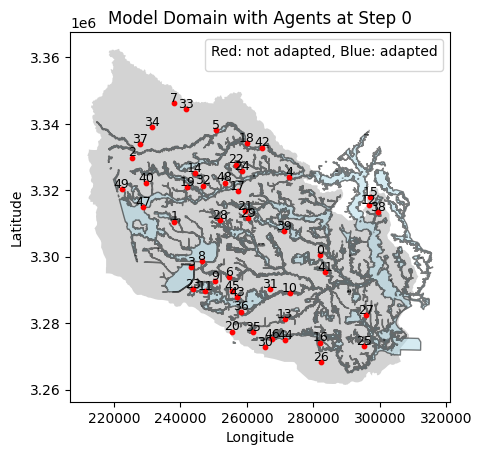

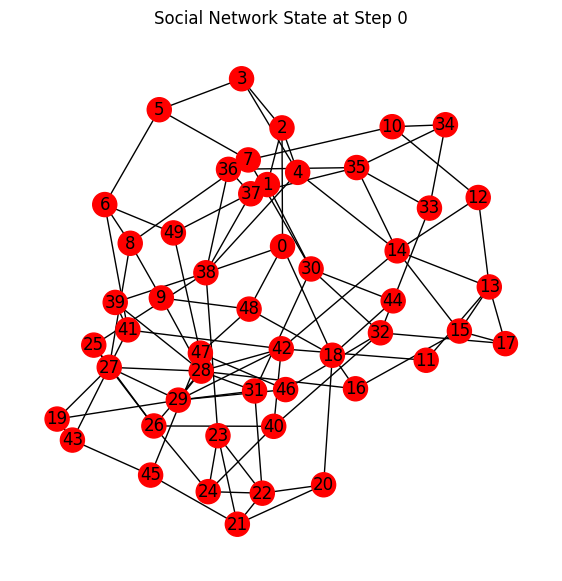

<Figure size 1000x600 with 0 Axes>

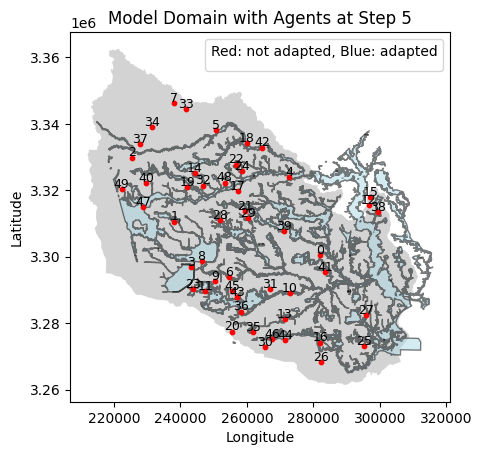

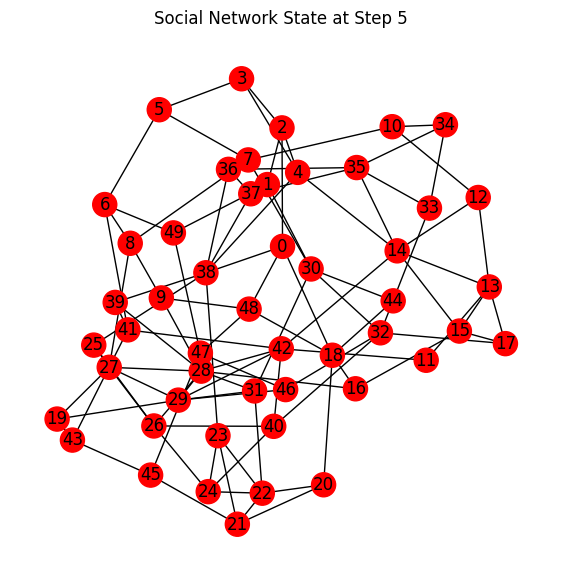

<Figure size 1000x600 with 0 Axes>

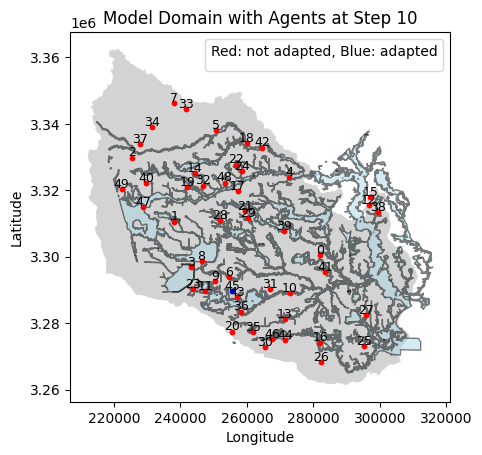

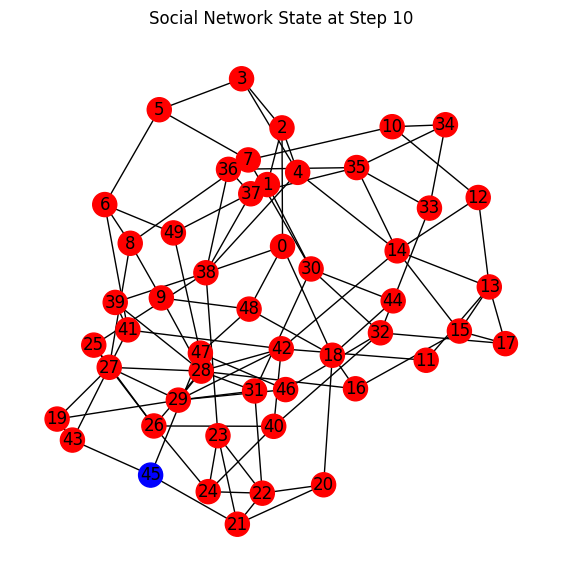

<Figure size 1000x600 with 0 Axes>

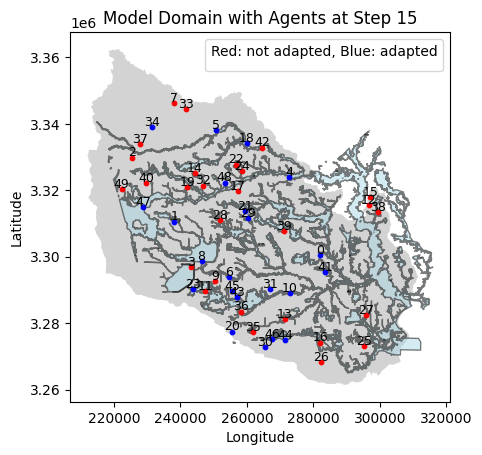

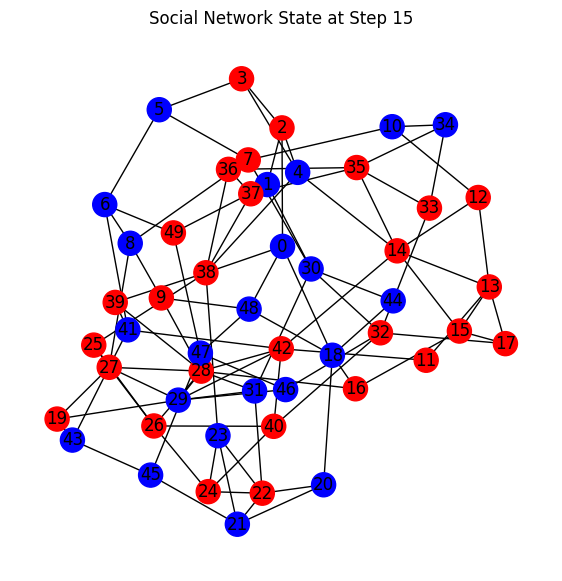

<Figure size 1000x600 with 0 Axes>

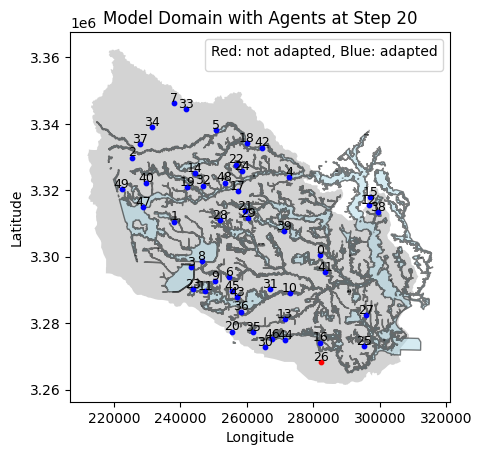

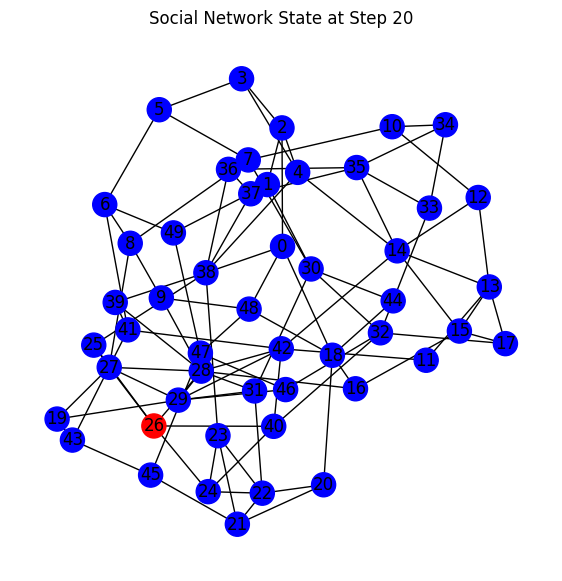

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz", I_threshold=50000, policy=1.0) # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
#random seed blijft het zelfde bij sensitivity analyse
#model = AdaptationModel(number_of_households=50, flood_map_choice="harvey",seed = 42 network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"


# experiment 1
#zelfde paramaters toetsen

result = [] 

for i in range(100):
    model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"
    for j in range(20):
        model.step()
    output = model.datacollector.get_agent_vars_dataframe()
    output['run_number'] = i
    result.append(output)

In [3]:
import pandas as pd

In [4]:
result[0]['Worry'].groupby('Step').mean()

Step
0     0.109534
1     0.139534
2     0.169534
3     0.199534
4     0.229534
5     0.255803
6     0.285803
7     0.315803
8     0.345803
9     0.375803
10    0.405803
11    0.431412
12    0.450354
13    0.479354
14    0.496931
15    0.506596
16    0.498977
17    0.491239
18    0.449239
19    0.439621
Name: Worry, dtype: float64

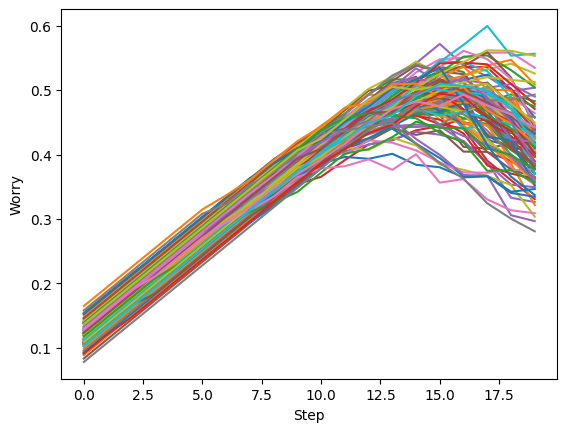

In [5]:
for run in result:
    sns.lineplot(run['Worry'].groupby('Step').mean())


In [6]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry 
agent_data['Age'].describe()
agent_data.iloc[-50:-1]['FloodDamageActual'].sum()
#agent_data.to_csv('I=55000')

9.367173542062853

In [7]:
I_4000= pd.read_csv('I=40000')
I_4500 = pd.read_csv('I=45000')
I_5000 = pd.read_csv('I=50000')
I_5500 = pd.read_csv('I=55000')


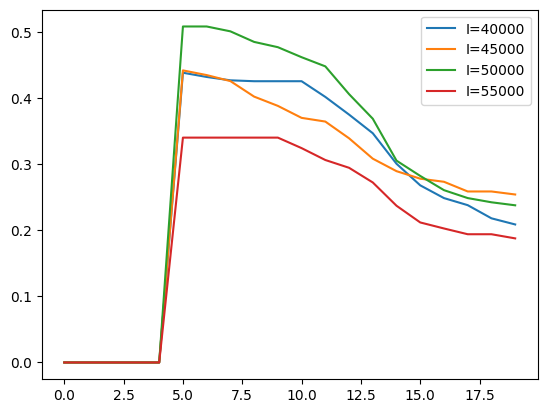

In [8]:
plt.plot(I_4000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=40000')
plt.plot(I_4500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=45000')
plt.plot(I_5000.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=50000')
plt.plot(I_5500.groupby(by='Step')['FloodDamageActual'].mean(), label= 'I=55000')
plt.legend()

In [9]:
agent_data.iloc[-50:-1]['Self_Investment'].mean() #average of self_investment of all agent

0.3591836734693878

In [10]:
agent_data.iloc[-50:-1]['Cum_Invest'].mean() #average of cumulative neighbor investment of all agents
#lower value probably because some agent do not have neighbors

1.2000000000000002

In [11]:
agent_data.iloc[-50:-1]['Costs'].mean()

0.64

In [12]:
steps = np.arange(0,20)

Text(0.5, 1.0, 'Cumulative Neighbour Invest over Time')

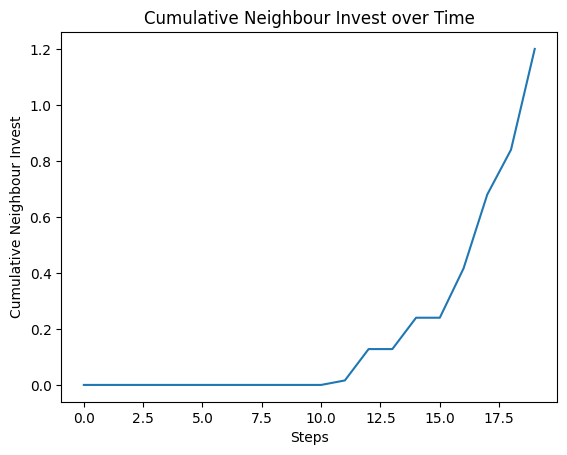

In [13]:
plt.plot(steps, agent_data.groupby(by='Step')['Cum_Invest'].mean(), label = 'Cumulative Neighbour Invest')
plt.ylabel('Cumulative Neighbour Invest')
plt.xlabel('Steps')
plt.title('Cumulative Neighbour Invest over Time')

Text(0.5, 1.0, 'Self Adaptation')

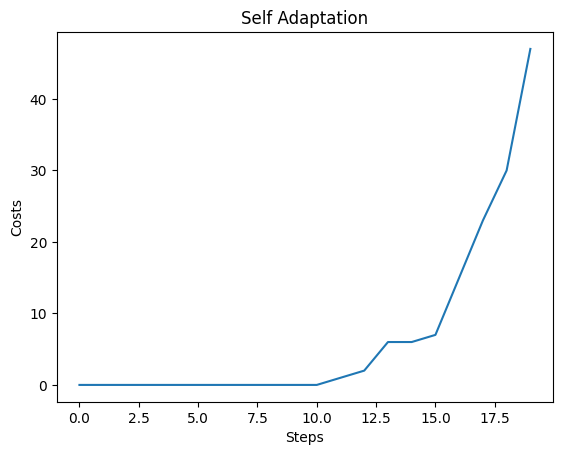

In [14]:
plt.plot(steps, agent_data.groupby(by='Step')['Self_Adaption'].sum(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Self Adaptation')

Text(0.5, 1.0, 'Costs over Time')

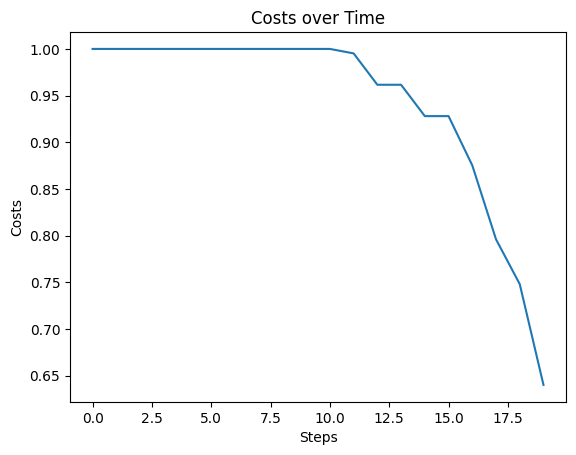

In [15]:
plt.plot(steps, agent_data.groupby(by='Step')['Costs'].mean(), label = 'Costs')
plt.ylabel('Costs')
plt.xlabel('Steps')
plt.title('Costs over Time')

Text(0.5, 1.0, 'Worry over Time')

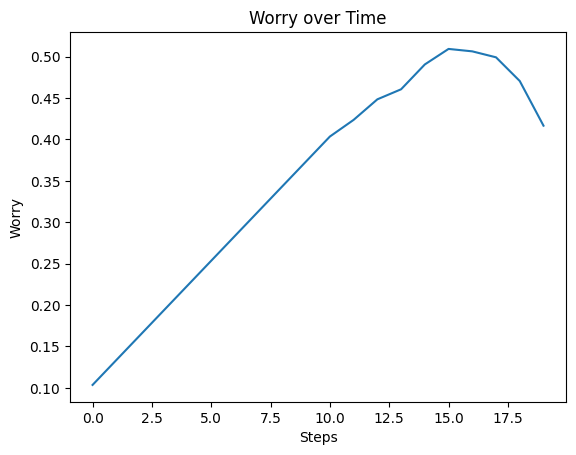

In [16]:
plt.plot(steps, agent_data.groupby(by='Step')['Worry'].mean(), label='Worry')
plt.ylabel('Worry')
plt.xlabel('Steps')
plt.title('Worry over Time')

Text(0.5, 1.0, 'Flood Damage over Time')

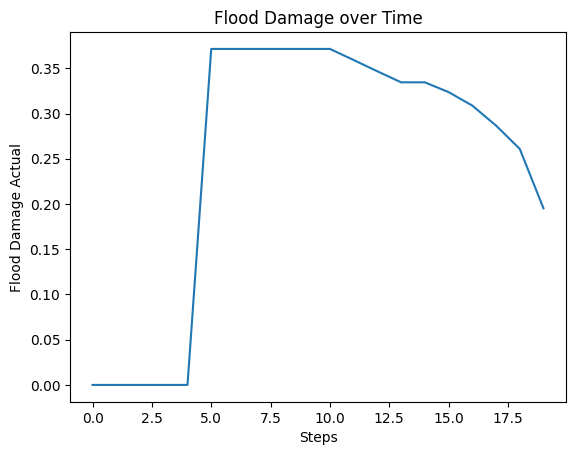

In [17]:
plt.plot(steps, agent_data.groupby(by='Step')['FloodDamageActual'].mean())
plt.ylabel('Flood Damage Actual')
plt.xlabel('Steps')
plt.title('Flood Damage over Time')

In [18]:
import pandas as pd

In [19]:
#I_50000 = agent_data.groupby(by='Step')['Worry'].mean()
I_45000 = agent_data.groupby(by='Step')['Worry'].mean()
#I_55000 = agent_data.groupby(by='Step')['Worry'].mean()

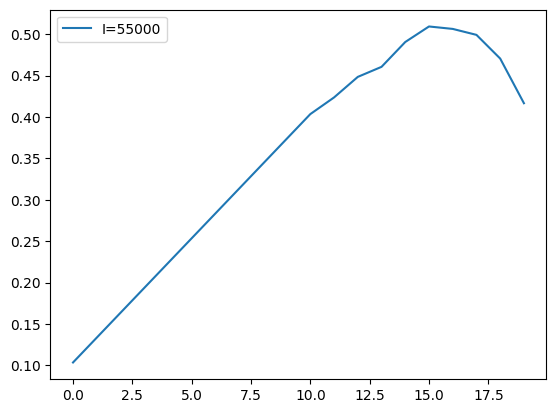

In [20]:
#plt.plot(I_50000, label='I=50000')
#plt.plot(I_45000, label='I=45000')
plt.plot(agent_data.groupby(by='Step')['Worry'].mean(), label='I=55000')
plt.legend()

Text(0.5, 1.0, 'Flood measurement active (Step10)')

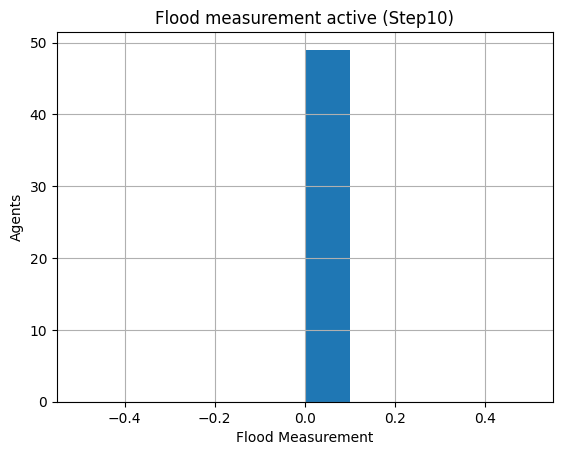

In [21]:
agent_data.iloc[-500:-451]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step10)')

Text(0.5, 1.0, 'Flood measurement active (Step19)')

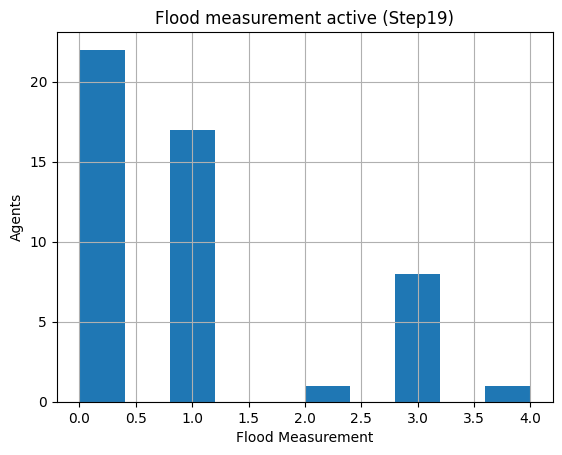

In [22]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (Step19)')

<Axes: xlabel='Step'>

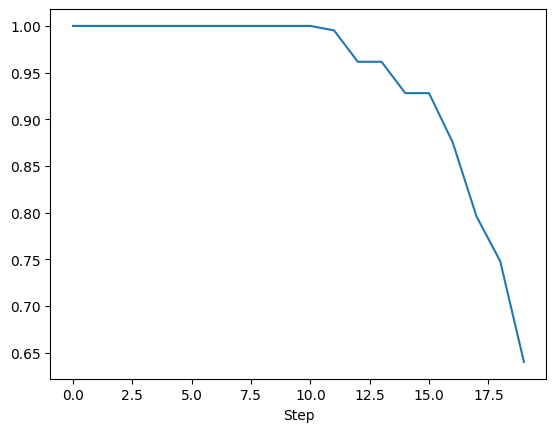

In [23]:
agent_data.groupby(by='Step')['Costs'].mean().plot()

In [24]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.000000              0.000000          0.000000   
     1                   0.231865              0.393105          0.207433   
     2                   0.000000              0.000000          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.231328              0.392700          0.266611   
     5                   1.937992              0.763825          1.523020   
     6                   0.000000              0.000000          0.000000   
     7                   1.247013              0.686843          0.819814   
     8                   0.166691              0.335484          0.124074   
     9                   0.866179              0.623216          0.850946   
     10                  1.338860              0.699251          0.837413   
     11                  0.782606              0.605501          0.723256   
     12                  2.143631              0.781433          1.889972   
     13                  0.977064              0.644249          1.163382   
     14                  0.812448              0.612035          0.955053   
     15                  0.881725              0.626322          0.589291   
     16                  0.000000              0.000000          0.000000   
     17                  0.614153              0.563181          0.399434   
     18                  0.000000              0.000000          0.000000   
     19                  1.194433              0.679321          0.661431   
     20                  0.288198              0.431079          0.186789   
     21                  0.561560              0.547549          0.637220   
     22                  0.625149              0.566279          0.424914   
     23                  0.983331              0.645365          0.561978   
     24                  0.000000              0.000000          0.000000   
     25                  0.382282              0.480405          0.364600   
     26                  0.000000              0.000000          0.000000   
     27                  0.525562              0.535982          0.330838   
     28                  2.854582              0.831442          1.966543   
     29                  0.000000              0.000000          0.000000   
     30                  2.196274              0.785669          2.111732   
     31                  0.000000              0.000000          0.000000   
     32                  0.333710              0.456679          0.273215   
     33                  0.000000              0.000000          0.000000   
     34                  0.000000              0.000000          0.000000   
     35                  0.251617              0.407379          0.293195   
     36                  0.622887              0.565646          0.547879   
     37                  0.223705              0.386849          0.156543   
     38                  0.424721              0.498786          0.347006   
     39                  0.000000              0.000000          0.000000   
     40                  0.473339              0.517709          0.286203   
     41                  0.000000              0.000000          0.000000   
     42                  0.661224              0.576075          0.393865   
     43                  2.427385              0.803138          2.411546   
     44                  0.190437              0.358738          0.215080   
     45                  0.376877              0.477919          0.296131   
     46                  1.073681              0.660713          1.204799   
     47                  0.000000              0.000000          0.000000   
     48                  0.323648              0.451334          0.239789   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

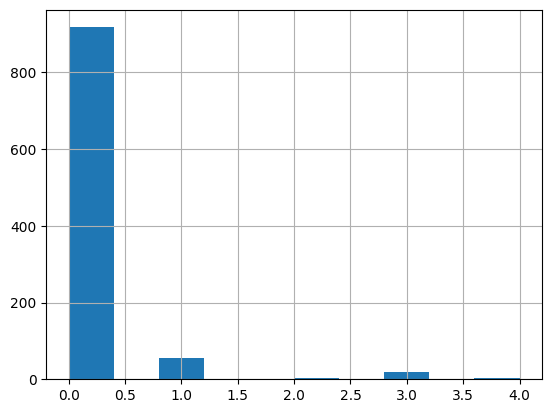

In [25]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [26]:
agent_data['FriendsCount']

Step  AgentID
0     0          4
      1          5
      2          3
      3          5
      4          4
                ..
19    45         4
      46         6
      47         3
      48         5
      49         3
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

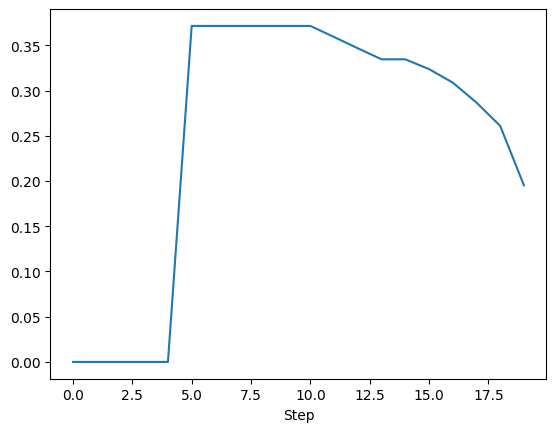

In [27]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

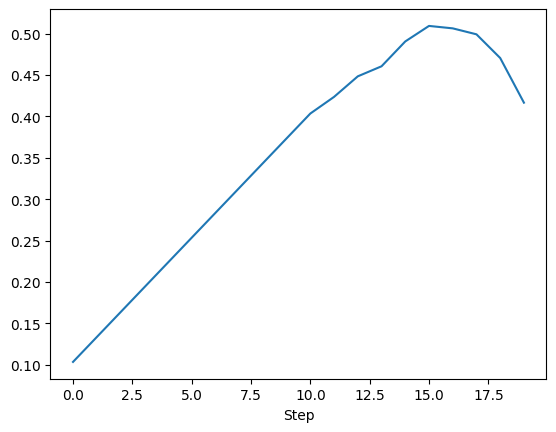

In [28]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [29]:
agent_data.groupby(by='Step')['Self_Investment'].mean()


Step
0     0.000
1     0.000
2     0.000
3     0.000
4     0.000
5     0.000
6     0.000
7     0.000
8     0.000
9     0.000
10    0.000
11    0.016
12    0.032
13    0.056
14    0.056
15    0.072
16    0.120
17    0.168
18    0.240
19    0.352
Name: Self_Investment, dtype: float64

In [30]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.2582537616309822

In [31]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.3709881404568892

In [32]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.3709881404568892

In [33]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
